In [7]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

In [8]:
# get data and show some records

data = pd.read_csv("iris.csv")
data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
125,7.2,3.2,6.0,1.8,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
29,4.7,3.2,1.6,0.2,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa


In [9]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
86             6.7           3.1            4.7           1.5
111            6.4           2.7            5.3           1.9
102            7.1           3.0            5.9           2.1
29             4.7           3.2            1.6           0.2
135            7.7           3.0            6.1           2.3
51     Iris-versicolor
96     Iris-versicolor
122     Iris-virginica
28         Iris-setosa
133     Iris-virginica
Name: Species, dtype: object


In [10]:
# see how many samples we have of each species 
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Datayı Görselleştirelim:

In [11]:
# use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

In [12]:
# do same for petals
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

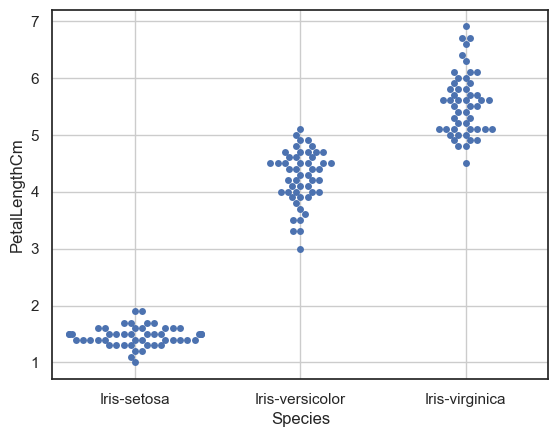

In [13]:
sns.swarmplot(x="Species", y="PetalLengthCm", data=data)
plt.grid()

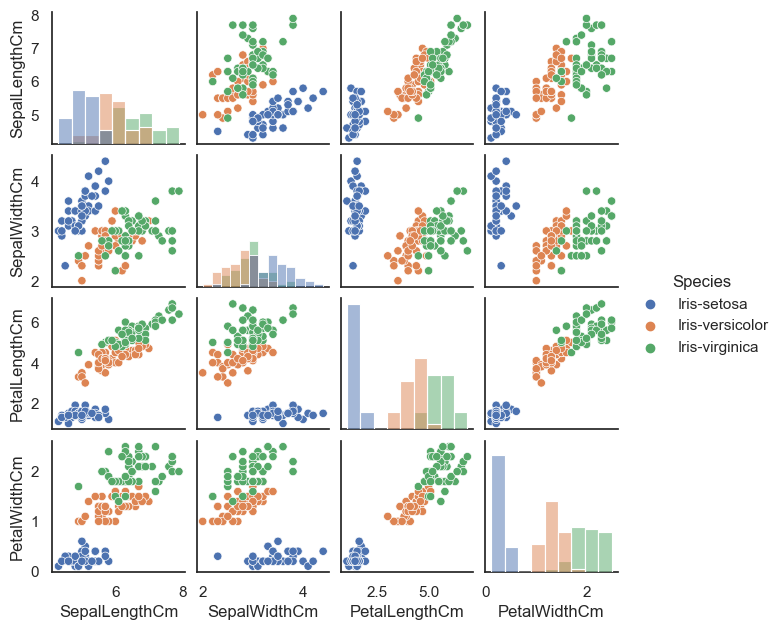

In [14]:
#Aralarındaki ilişkiyi daha iyi görmek için: 
sns.pairplot(data, hue="Species", diag_kind="hist", size=1.6);

In [15]:
# Data unbalanced olduğu için feature scaling kullanılacak ve sonra modellemelere geçilecek 

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
140,1.038005,0.106445,1.047087,1.579429
58,0.916837,-0.356361,0.478430,0.133226
10,-0.537178,1.494863,-1.284407,-1.312977
131,2.492019,1.726266,1.502013,1.053537
108,1.038005,-1.281972,1.160819,0.790591


In [16]:
#kmeans clustering

from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [17]:
#görseller üzerinde çalıştığım için accuracy scor silhoute xcore üzerinden yapılacak
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4589717867018717

# Principal Component Analysis

In [18]:

from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
21,-2.204645,0.952457
34,-2.188676,-0.448629
93,-0.373628,-2.017932
75,0.873537,0.250709
76,1.254222,-0.082620


In [20]:
# Dataların iki boyutlu kordinatını çıkarmış olduk.

y_id_array = pd.Categorical.from_array(data['Species']).codes

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.sample(5)

AttributeError: type object 'Categorical' has no attribute 'from_array'

	PC1	PC2	ClusterKmeans	SpeciesId
70	0.738256	0.402470	2	1
21	-2.204645	0.952457	1	0
135	2.800949	0.844748	2	2
132	1.860371	-0.184672	2	2
78	0.662126	-0.224346	0	1

In [21]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

In [22]:
plotData(df_plot, 'ClusterKmeans')

NameError: name 'df_plot' is not defined

In [25]:
plotData(df_plot, 'SpeciesId')

NameError: name 'df_plot' is not defined

In [27]:
from sklearn.metrics.cluster import adjusted_rand_score

score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.6201351808870379

Principal Component Analysis high-dimensional dataset görselleştirmek için uygundur ve bunları 2 boyuta indirger.

K means clusterinf de hızlı bir şekilde dataları kümeler. 